In [35]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random as rn
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [36]:
import os
rootdir = '/home/kali/Zoohack/wildlife/'
num =[i for i in range(0,25)]
name =[]

for i in os.listdir(rootdir):
    name.append(i)
final = dict(zip(num, name))


def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        for key,val in final.items():
            if labels == val:
                label = key
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = final
    return labels[class_code]

In [37]:
Images, Labels = get_images('/home/kali/Zoohack/wildlife/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [39]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (3922, 150, 150, 3)
Shape of Labels: (3922,)


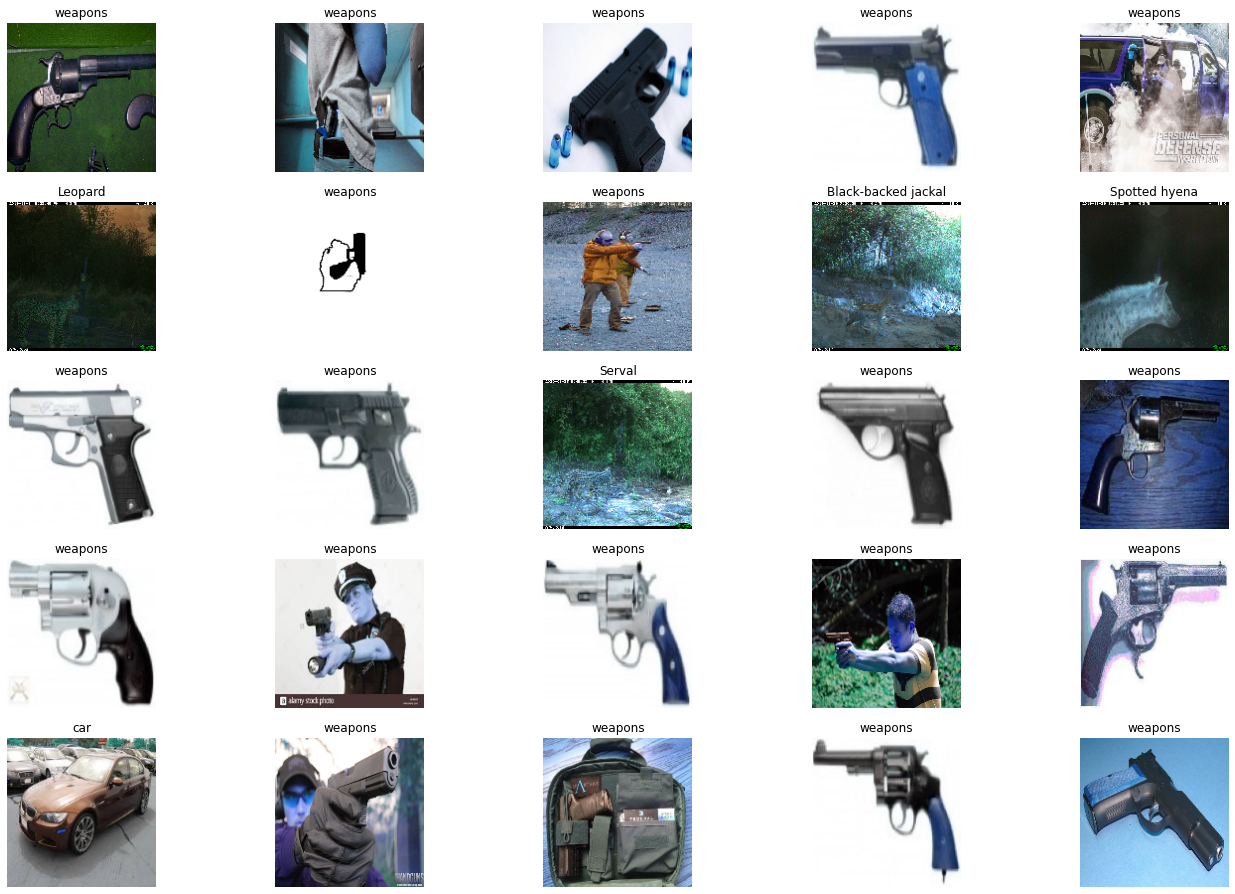

In [40]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [41]:
Images_train,Images_test,Labels_train,Labels_test=train_test_split(Images,Labels,test_size=0.25,random_state=42)

In [42]:
# Normalize pixel values to be between 0 and 1
Images_train, Images_test = Images_train/255.0, Images_test/255.0

In [43]:
np.random.seed(42)
rn.seed(42)
tf.compat.v1.random.set_random_seed(42)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 50)       

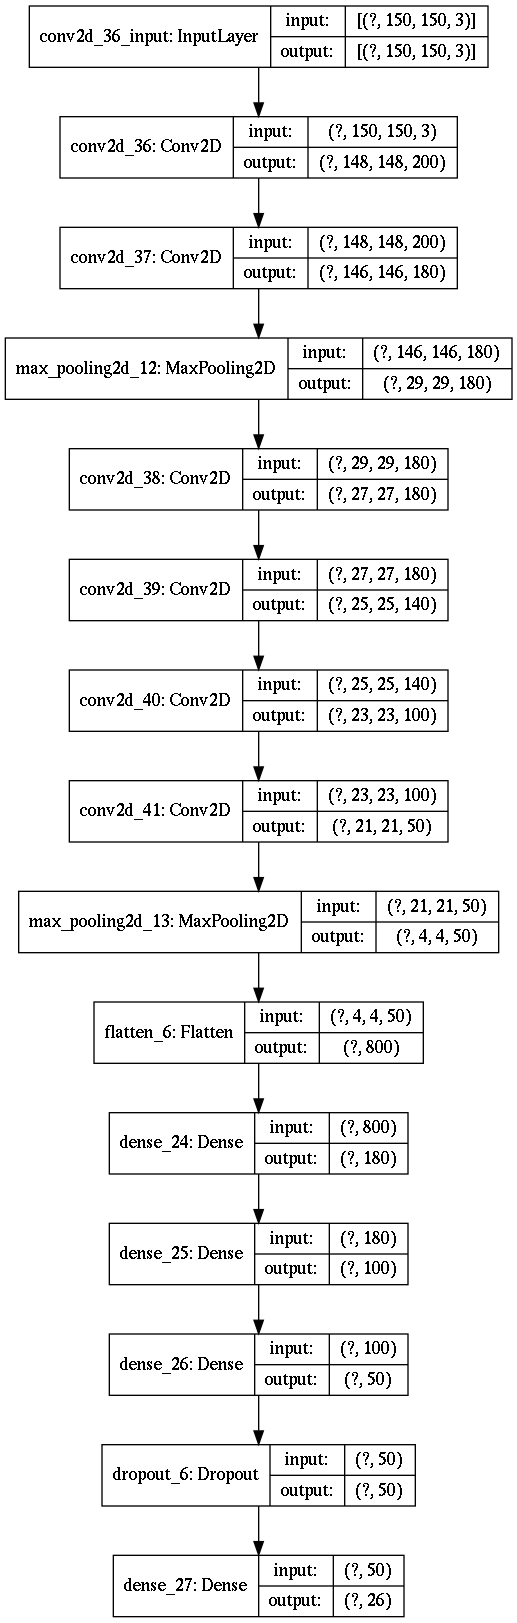

In [44]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(26,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [45]:
trained = model.fit(Images_train,Labels_train,epochs=10,validation_split=0.30)

Epoch 1/10
65/65 [==============================] - 535s 8s/step - loss: 2.0848 - accuracy: 0.4266 - val_loss: 1.0235 - val_accuracy: 0.7633
Epoch 2/10
65/65 [==============================] - 540s 8s/step - loss: 1.3967 - accuracy: 0.6550 - val_loss: 0.9116 - val_accuracy: 0.7633
Epoch 3/10
65/65 [==============================] - 534s 8s/step - loss: 1.2666 - accuracy: 0.6924 - val_loss: 0.8648 - val_accuracy: 0.7633
Epoch 4/10
65/65 [==============================] - 522s 8s/step - loss: 1.0852 - accuracy: 0.7080 - val_loss: 0.7119 - val_accuracy: 0.7633
Epoch 5/10
65/65 [==============================] - 551s 8s/step - loss: 0.9413 - accuracy: 0.7216 - val_loss: 0.6235 - val_accuracy: 0.7939
Epoch 6/10
65/65 [==============================] - 642s 10s/step - loss: 0.8520 - accuracy: 0.7464 - val_loss: 0.5935 - val_accuracy: 0.8131
Epoch 7/10
65/65 [==============================] - 625s 10s/step - loss: 0.8215 - accuracy: 0.7566 - val_loss: 0.5817 - val_accuracy: 0.8279
Epoch 8/10


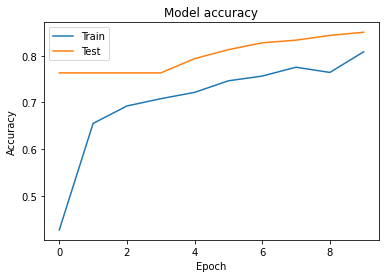

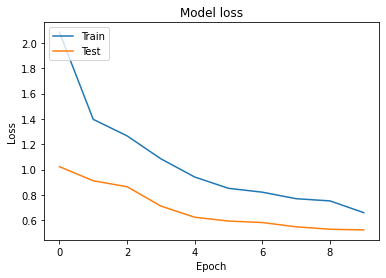

In [48]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [49]:
test_images = np.array(Images_test)
test_labels = np.array(Labels_test)
model.evaluate(test_images,test_labels, verbose=1)

31/31 [==============================] - 63s 2s/step - loss: 0.5132 - accuracy: 0.8481


[0.5132064819335938, 0.8481141924858093]